In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
import mplfinance as mpf
import io
print('pandas      version:',pd.__version__)
print('mplfinance  version:',mpf.__version__)

pandas      version: 1.1.2
mplfinance  version: 0.12.7a14


---

# Saving your plot to a file (or to an io buffer):

- `mplfinance.plot()` allows you to save your plot to a file, or io-buffer, using the `savefig` keyword.
- The value of `savefig` may be a `str`, `dict`, `io.ByteIO` object, or `pathlib.Path` object. 
  - If the value is a `str` then it is assumed to be the file name to which to save the figure/plot.
  - If the value is an `io.ByteIO` object, then the figure will be saved to the io buffer object.  This avoids interaction with disk, and can also be useful when mplfinance is behind a web server (so that requests for an image file can be serviced without going to disk).
  - Using a `pathlib.Path` object (or anything using the `os.PathLike` interface) helps with path manpulation and cross-platform path management.

If the file extension is one of those recognized by `matplotlib.pyplot.savefig()` then the file type will be inferred from the extension, for example: `.pdf`, `.svg`, `.png`, `.jpg` ...


In [3]:
df = pd.read_csv('data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)

In [4]:
%%capture 
## cell magic function `%%capture` blocks jupyter notebook output,
## which is not needed here since the plot is saved to a file anyway:
mpf.plot(df,type='candle',volume=True,savefig='testsave.png')

---

### We can use IPython.display.Image to display the image file here in the notebook:

In [5]:
import IPython.display as IPydisplay

-rw-r--r-- 1 dino dino 24821 Apr 18 22:49 testsave.png


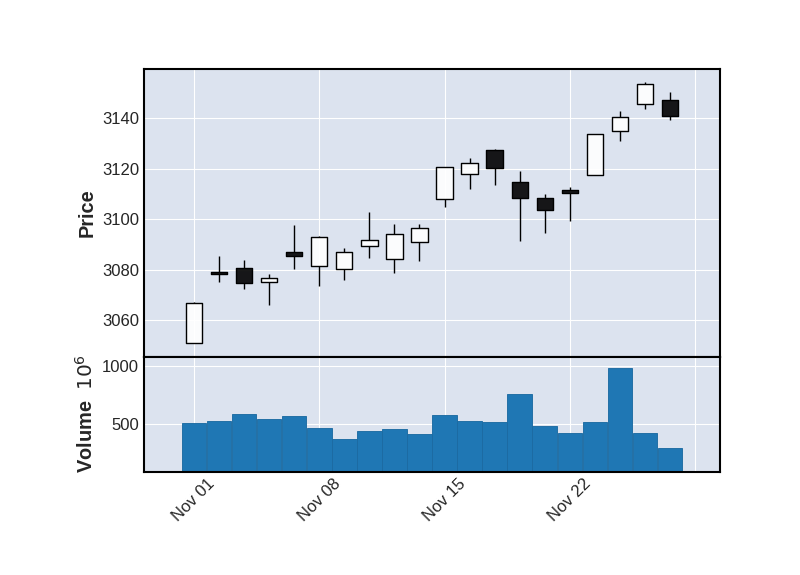

In [6]:
%ls -l testsave.png
IPydisplay.Image(filename='testsave.png')

---

### We can use io to save the plot as a byte buffer:

In [7]:
%%capture 
## cell magic function `%%capture` blocks jupyter notebook output, 
## which is not needed here, since the plot is saved to the io-buffer anyway:
buf = io.BytesIO()
mpf.plot(df,type='candle',volume=True,savefig=buf)
buf.seek(0)

### We can use Ipython.display.Image to display the image in the ioBytes buffer:

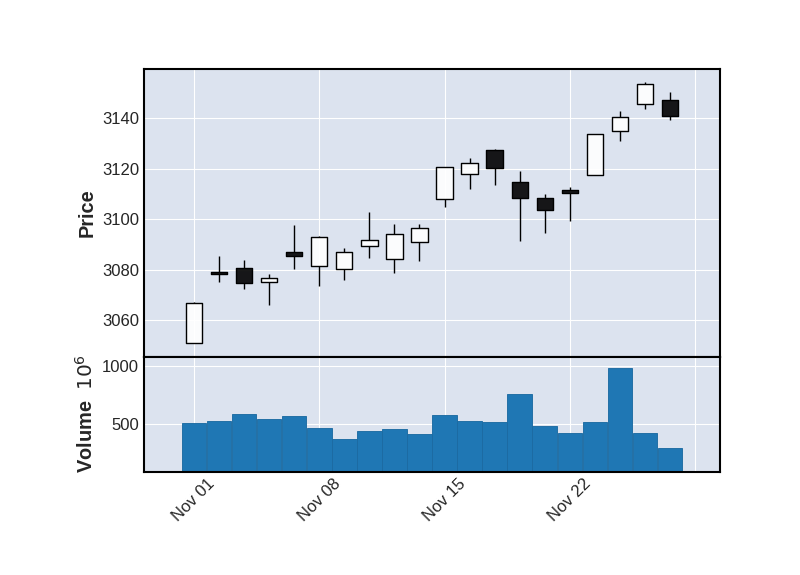

In [8]:
IPydisplay.Image(buf.read())

### We can use `pathlib.Path` objects as output filenames:

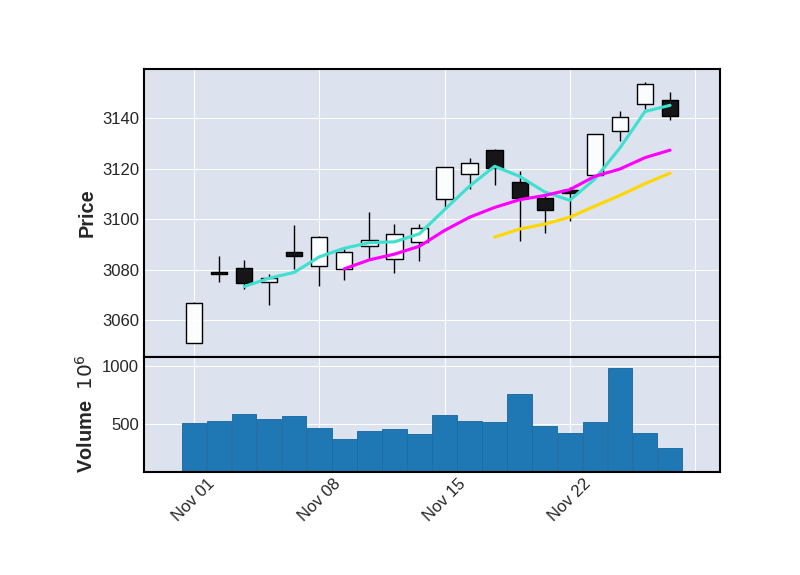

In [9]:
import pathlib
ourpath = pathlib.Path("/tmp") / "ourfigure.png"
mpf.plot(df, type='candle', volume=True, mav=(3, 7, 13), savefig=ourpath)
IPydisplay.Image(ourpath)

---

# Specifying image attributes with `savefig`

We can control various attributes of the saved figure/plot by passing a `dict`ionary as the value for the `savefig` keyword.

The dictionary **must** contain the keyword `fname` for the file name to be saved, **and *may* contain any of the other keywords accepted by [`matplotlib.pyplot.savefig()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html)**  (for example: dpi, facecolor, edgecolor, orientation, format, metadata, quality)

When creating the `dict`, I recommend using the `dict()` constructor so that that `keyword=` syntax may be used and thereby more closely resemble calling:
**[`matplotlib.pyplot.savefig()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html)**


In [10]:
%%capture
## %%capture blocks jupyter notebook output; plots are saved to files anyway:
save = dict(fname='tsave30.jpg',dpi=30,pad_inches=0.25)
mpf.plot(df,volume=True,savefig=save)
mpf.plot(df,volume=True,savefig=dict(fname='tsave100.jpg',dpi=100,pad_inches=0.25))

-rw-r--r-- 1 dino dino 11280 Apr 18 22:49 tsave30.jpg
-rw-r--r-- 1 dino dino 54741 Apr 18 22:49 tsave100.jpg


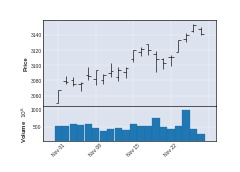

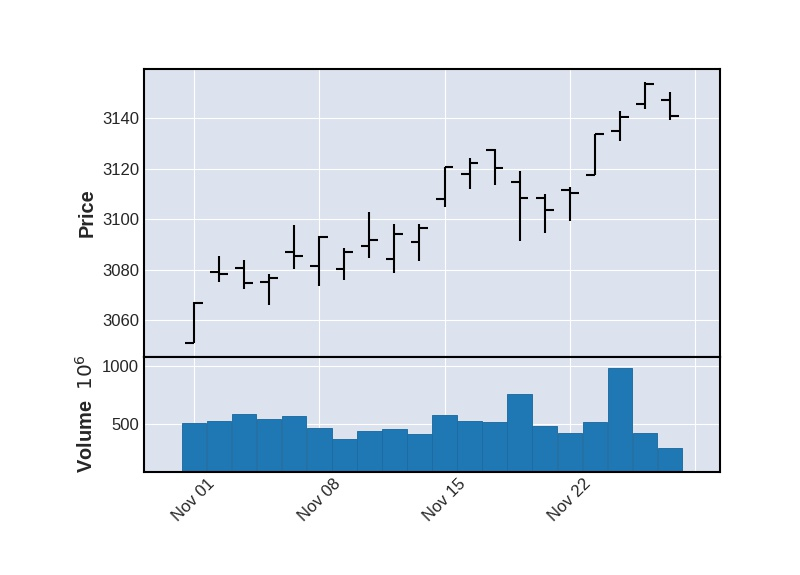

In [11]:
%ls -l tsave30.jpg
%ls -l tsave100.jpg
IPydisplay.Image(filename='tsave30.jpg')
IPydisplay.Image(filename='tsave100.jpg')

## Specifying image attributes (via `savefig`) dict also works with an io.BytesIO buffer:
- Just assign the io-buffer to the `fname` key in the savefig dict

In [12]:
%%capture
buf30dpi  = io.BytesIO()
buf100dpi = io.BytesIO()
mpf.plot(df,volume=True,savefig=dict(fname=buf30dpi ,dpi=30 ,pad_inches=0.25))
mpf.plot(df,volume=True,savefig=dict(fname=buf100dpi,dpi=100,pad_inches=0.25))

### Use Ipython.display.Image to display the buffer contents:

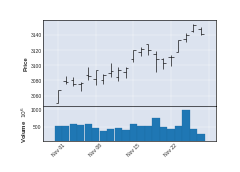

In [13]:
_ = buf30dpi.seek(0)
IPydisplay.Image(buf30dpi.read())

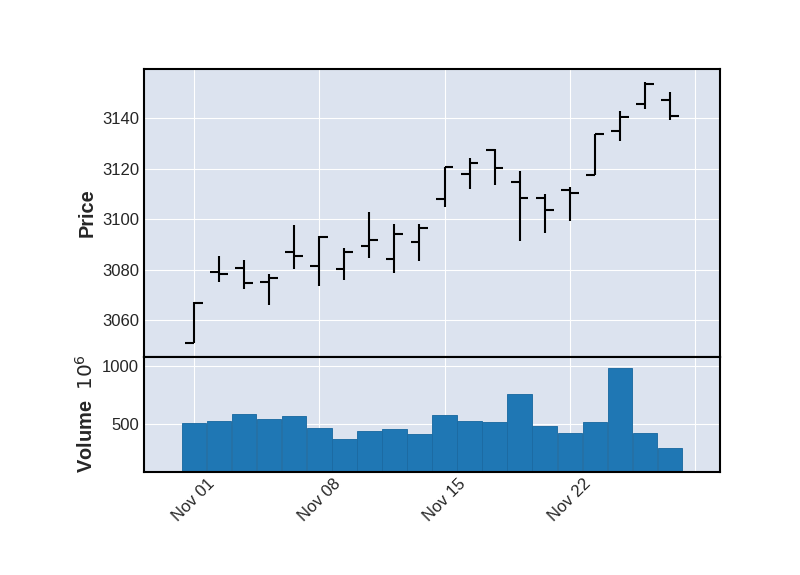

In [14]:
_ = buf100dpi.seek(0)
IPydisplay.Image(buf100dpi.read())

---

## A note about `jpeg` files:

**[`matplotlib.pyplot.savefig()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html)** uses the Python Image Library (PIL or pillow) to save jpeg files.  
Thus you must have pillow installed (`pip install pillow`) to save jpeg images.  

**Version 3.1.2 of matplotlib has an incompatibility with version 7.x.x of pillow** (which was released to PyPI on On January 2, 2020.  This incompatibility was **[fixed here](https://github.com/matplotlib/matplotlib/pull/16086/commits)** however (as of this writting) the fixed version of matplotlib was not yet on PyPI (to be pip installable), *but it may be by the time you read this*.

If you encounter an exception when trying to save a jpeg file, that says "format 'jpg' is not supported" check that you have pillow installed.  If you do have pillow 7.x.x installed, and you are encountering this exception, the permanent fix for the problem is to upgrade to the new version of matplotlib `pip install --upgrade matplotlib`.  (This should work if the new version of matplotlib is on Pypi at the time).

If upgrading matplotlib doesn't work, you can immediately fix this problem in one of the following temporary solutions:

- install the previous version of pillow: **`pip install Pillow==6.2.2`**
- edit your installed version of `.../site-packages/matplotlib/backend_bases.py` and apply **[this one-line fix](https://github.com/matplotlib/matplotlib/pull/16086/files).**


---